In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [42]:
data = pd.read_csv('data.csv')
data.head(15)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [127]:
data.describe(include='all')

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,male,75+ years,NaN,NaN,NaN,Poland1996,NaN,"513,753,818",NaN,Generation X
freq,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


в первой итерации пробую без HDI, потом добавлю

In [129]:
data.shape

(27820, 10)

In [130]:
data.isnull().sum()

sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [131]:
data.dtypes

sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [132]:
data.sex.value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [142]:
data_dummies = pd.get_dummies(data, columns=["sex"])
data_dummies.head()

,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,sex_female,sex_male
0,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1
1,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0,1
2,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1,0
3,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0,1
4,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,1


In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
encoder = LabelEncoder()

In [145]:
data_dummies["generation_code"] = encoder.fit_transform(data_dummies["generation"])

In [146]:
data_dummies["age_code"] = encoder.fit_transform(data_dummies["age"])

In [147]:
data_dummies.head(20)

,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,sex_female,sex_male,generation_code,age_code
0,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1,2,0
1,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0,1,5,2
2,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1,0,2,0
3,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0,1,1,5
4,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,1,0,1
5,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1,0,1,5
6,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,1,0,5,2
7,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,1,0,0,1
8,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0,1,1,4
9,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X,1,0,2,3


In [148]:
data_dummies.dtypes

age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
sex_female              uint8
sex_male                uint8
generation_code         int64
age_code                int64
dtype: object

In [149]:
data_dummies.rename(columns={"gdp_for_year ($)": "gdp"}, inplace = True)
data_dummies.head()

,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,sex_female,sex_male,generation_code,age_code
0,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0,1,2,0
1,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0,1,5,2
2,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1,0,2,0
3,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0,1,1,5
4,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0,1,0,1


In [150]:
%matplotlib inline

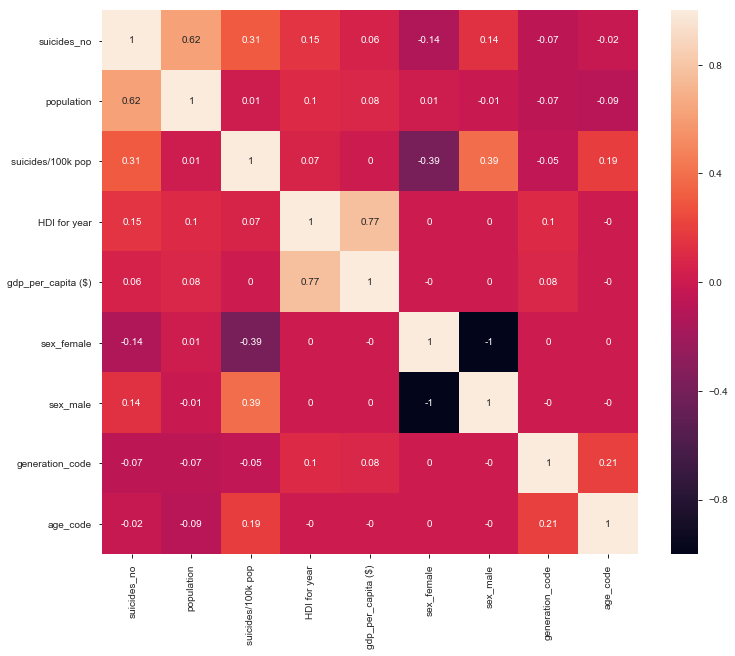

In [151]:
correlation_matrix = data_dummies.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [152]:
df = data_dummies[['sex_female', 'sex_male', 'generation_code', 
                   'age_code', 'suicides_no', 'population', 'suicides/100k pop']]

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
sex_female           27820 non-null uint8
sex_male             27820 non-null uint8
generation_code      27820 non-null int64
age_code             27820 non-null int64
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
dtypes: float64(1), int64(4), uint8(2)
memory usage: 1.1 MB


In [154]:
df.describe()

,sex_female,sex_male,generation_code,age_code,suicides_no,population,suicides/100k pop
count,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,0.500000,0.500000,2.701869,2.499425,242.574407,1.844794e+06,12.816097
std,0.500009,0.500009,1.809836,1.708754,902.047917,3.911779e+06,18.961511
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000
25%,0.000000,0.000000,1.000000,1.000000,3.000000,9.749850e+04,0.920000
50%,0.500000,0.500000,2.000000,2.000000,25.000000,4.301500e+05,5.990000
75%,1.000000,1.000000,4.000000,4.000000,131.000000,1.486143e+06,16.620000
max,1.000000,1.000000,5.000000,5.000000,22338.000000,4.380521e+07,224.970000


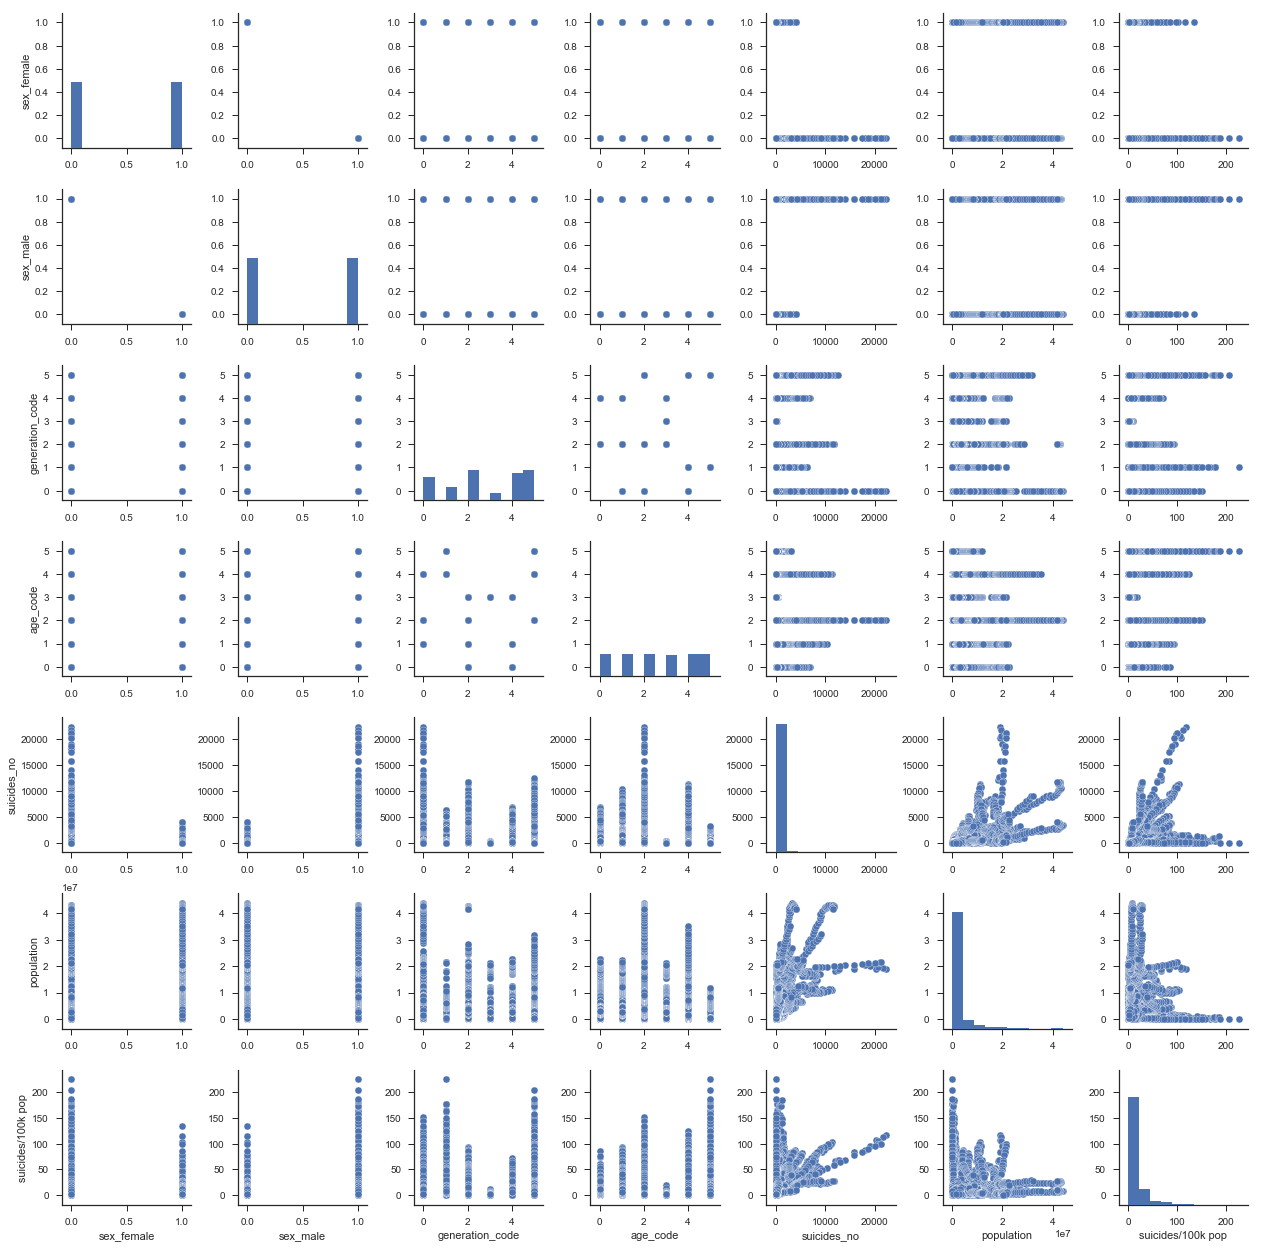

In [166]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

In [161]:
X_columns = df.columns[:-1]
y_column = df.columns[-1]

In [162]:
X = df[X_columns]
y = df[y_column]

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [164]:
X_train.shape, X_test.shape

((22256, 6), (5564, 6))

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.2924505864632755
RMSE: 	 15.808358146699945
MAE: 	 10.007312634528152


Чрезвычайно низкий r2, большинство данных не успела обработать, - еще пилить и пилить... profile не смогла загрузить.